In [9]:
import pandas as pd
import numpy as np
import seaborn as sns 
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [10]:
# I used http://www.gridreferencefinder.com/ to get these coordinates. I manually drew a box and made pointers for the 
# four corners of the box
exeter_coords = pd.read_csv("../data/Exeter_box.csv", header = 0)
print(exeter_coords)

    Title     GridReference  Easting  Northing   Latitude  Longitude  \
0  Exeter  SX 91812 \n92099   291812     92099  50.718412  -3.533899   
1      TL    SX 88878 95219   288878     95219  50.745906  -3.576393   
2      TR    SX 97588 95149   297588     95149  50.746884  -3.452969   
3      BL    SX 88796 88510   288796     88510  50.685583  -3.575535   
4      BR    SX 97466 88333   297466     88333  50.685583  -3.452797   

    Postcode  
0    EX2 4EB  
1  EX5 \n5EU  
2  EX1 \n3TR  
3  EX2 \n9TW  
4  EX3 \n0PB  


In [11]:
exeter_coords[["Latitude","Longitude"]]

,Latitude,Longitude
0,50.718412,-3.533899
1,50.745906,-3.576393
2,50.746884,-3.452969
3,50.685583,-3.575535
4,50.685583,-3.452797


In [12]:
road_coords = pd.read_csv("../data/road_coords.csv", header = 0)

llcrnrlon =    	longitude of lower left hand corner of the desired map domain (degrees).               
llcrnrlat =   	latitude of lower left hand corner of the desired map domain (degrees).                
urcrnrlon =   	longitude of upper right hand corner of the desired map domain (degrees).               
urcrnrlat =  	latitude of upper right hand corner of the desired map domain (degrees).             

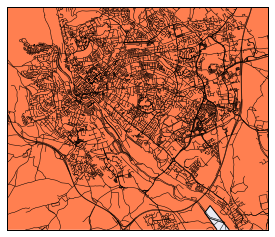

In [5]:

map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-3.57, llcrnrlat=50.68,
    urcrnrlon=-3.45, urcrnrlat=50.745)
 

map.readshapefile('../../devon-latest-free/roads', 'roads')    
    
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()

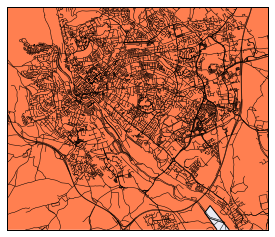

In [10]:
 
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-3.57, llcrnrlat=50.68,
    urcrnrlon=-3.45, urcrnrlat=50.745)
 

map.readshapefile('../../devon-latest-free/roads', 'osm_roads')    
    
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()

Also tried plotting traffic, places but they did not give anything as clear as the road shapefile

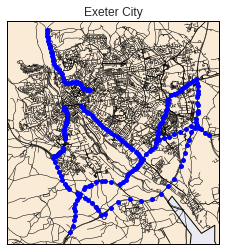

In [6]:
 
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.2,
    llcrnrlon=-3.57, llcrnrlat=50.67,
    urcrnrlon=-3.45, urcrnrlat=50.75)

map.readshapefile('../../devon-latest-free/roads', 'osm_roads')    
    
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'antiquewhite')
map.drawmapboundary()

lat = road_coords["Latitude"].tolist()
lon = road_coords["Longitude"].tolist()
x,y = map(lon, lat)
map.plot(x, y, 'bo', markersize=5)

plt.title('Exeter City')

fig = plt.gcf()
plt.show()
fig.savefig('../plots/Exeter_test.png', dpi=100)



In [38]:
plt.savefig('../plots/Exeter_test.png')

### Import % useage figures for each data point on each road

In [16]:
# import just the Exeter data
exeter_data = pd.read_csv("../data/Exeter_city_only.csv", header = 0)

In [17]:
# import my normalised coordinate data
road_coords = pd.read_csv("../data/road_coords_norm_vals2014.csv", header = 0)

In [6]:
CP = 6407
road_coords["PedalCycles%"][road_coords["CP"] == CP].tolist()[0]

0.23337515683814306

In [43]:
# Find points for putting the legend
road_coords.describe()

,CP,Easting,Northing,Latitude,Longitude,LinkLength_miles,PedalCycles%,Motorcycles%,CarsTaxis%,BusesCoaches%,LightGoodsVehicles%,AllHGVs%,AllMotorVehicles%,All%
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.00000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,46651.075117,293497.051643,91093.549296,50.709686,-3.509754,1.55784,0.059886,0.059905,0.059280,0.065540,0.057984,0.059779,0.059150,0.059154
std,33460.740776,1990.204622,1781.274812,0.015999,0.028208,0.89119,0.071337,0.024230,0.037551,0.039698,0.046036,0.079103,0.040095,0.039740
min,6407.000000,290904.000000,87203.000000,50.674379,-3.547661,0.31000,0.000000,0.028731,0.024458,0.020312,0.022574,0.007707,0.024363,0.024396
25%,16971.000000,291639.000000,89802.000000,50.697980,-3.536230,1.05000,0.003450,0.038808,0.036830,0.036797,0.026241,0.015174,0.033448,0.033787
50%,37882.000000,292935.000000,91105.000000,50.710265,-3.516784,1.30000,0.029799,0.062607,0.046407,0.051810,0.043240,0.025516,0.044649,0.044780
75%,77996.000000,295322.000000,92245.000000,50.720645,-3.483975,2.23000,0.097240,0.065823,0.067967,0.082131,0.072400,0.047319,0.069341,0.070509
max,99846.000000,297296.000000,95257.000000,50.746639,-3.455930,3.54000,0.258783,0.137221,0.154479,0.151310,0.170803,0.265144,0.159542,0.158557


In [51]:
list(road_coords["Road"].unique())

['A379', 'M5', 'A377', 'A376', 'A30', 'A3015']

#### Make the plots again, but this time with different-sized markers depending on how large the AADF is.

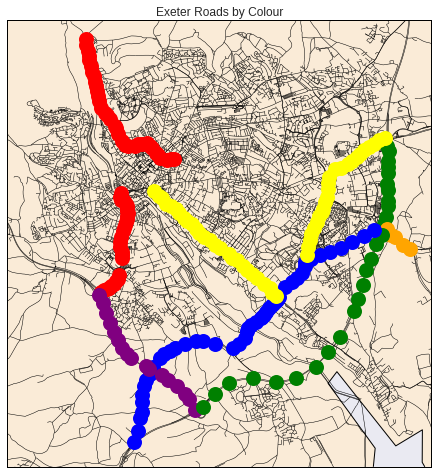

In [54]:

fig = plt.figure(figsize=(8,8))

map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.2,
    llcrnrlon=-3.57, llcrnrlat=50.67,
    urcrnrlon=-3.45, urcrnrlat=50.75)

map.readshapefile('../data/roads', 'osm_roads')    
    
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'antiquewhite')
map.drawmapboundary()

colors = {'A379':'b','M5':'g','A377':'r','A376':'orange','A30':'purple','A3015':'yellow'}

for CP in road_coords["CP"].unique():
    
    lat = road_coords["Latitude"][road_coords["CP"] == CP].tolist()
    lon = road_coords["Longitude"][road_coords["CP"] == CP].tolist()
    x,y = map(lon, lat)
    
    markercolor = colors[road_coords["Road"][road_coords["CP"] == CP].tolist()[0]]
    
    map.plot(x, y, 'o', color = markercolor, markersize=0.15*100)
    
        
## A handmade legend to describe what the sizes show

#lons = [-3.46, -3.48, -3.50]
#lats = [50.68, 50.68, 50.68]
#markersize = [0.25,0.15,0.5]*100
#x, y = map(lons, lats)
# plot one point at a time
#for i in range(3):
    #map.plot(lons[i], lats[i], 'bo', markersize = 120)
#####################################################


    
plt.title('Exeter Roads by Colour')    
    
fig = plt.gcf()
plt.show()
fig.savefig('../plots/maps/Roads_colored.png', dpi=100)

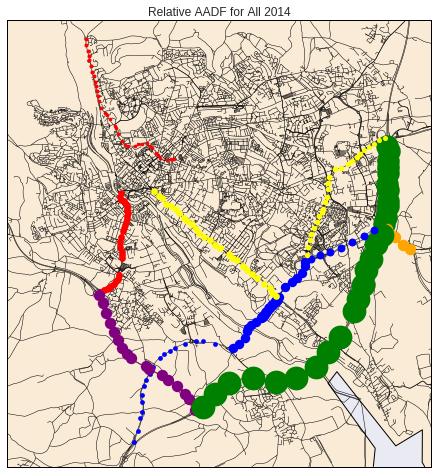

In [18]:
# make a loop over each of the mode types
#mode = ['PedalCycles', 'Motorcycles', 'CarsTaxis', 'BusesCoaches', 'LightGoodsVehicles', 'AllHGVs', 'AllMotorVehicles',
        #'All']

mode = ["All"]
colors = ['b','g','r','indianred','orange','purple','yellow','fuchsia']

for i,m in enumerate(mode):
    
    fig = plt.figure(figsize=(8,8))

    map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
        resolution = 'h', area_thresh = 0.2,
        llcrnrlon=-3.57, llcrnrlat=50.67,
        urcrnrlon=-3.45, urcrnrlat=50.75)

    map.readshapefile('../data/roads', 'osm_roads')    

    map.drawcoastlines()
    map.drawcountries()
    map.fillcontinents(color = 'antiquewhite')
    map.drawmapboundary()

    for CP in road_coords["CP"].unique():

        lat = road_coords["Latitude"][road_coords["CP"] == CP].tolist()
        lon = road_coords["Longitude"][road_coords["CP"] == CP].tolist()
        x,y = map(lon, lat)

        markersize = road_coords[m+"%"][road_coords["CP"] == CP].tolist()[0]
        
        colors = {'A379':'b','M5':'g','A377':'r','A376':'orange','A30':'purple','A3015':'yellow'}
        
        markercolor = colors[road_coords["Road"][road_coords["CP"] == CP].tolist()[0]]

        map.plot(x, y, 'o', color = markercolor, markersize=markersize*150)

    plt.title('Relative AADF for %s 2014'%m)    

    fig = plt.gcf()
    plt.show()
    fig.savefig('../plots/colorExeter_%s2014.png'%m, dpi=150)
    

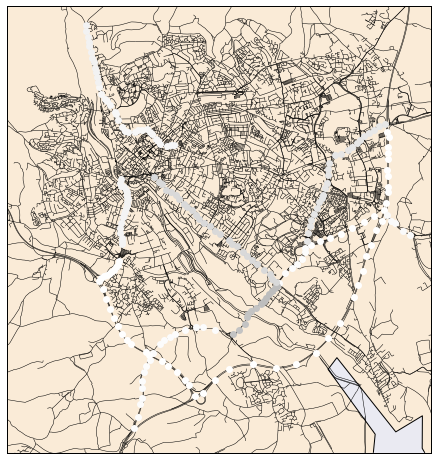

In [67]:
fig = plt.figure(figsize=(8,8))

map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.2,
    llcrnrlon=-3.57, llcrnrlat=50.67,
    urcrnrlon=-3.45, urcrnrlat=50.75)

map.readshapefile('../../devon-latest-free/roads', 'osm_roads')    
    
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'antiquewhite')
map.drawmapboundary()

for CP in road_coords["CP"].unique():
    
    lat = road_coords["Latitude"][road_coords["CP"] == CP].tolist()
    lon = road_coords["Longitude"][road_coords["CP"] == CP].tolist()
    x,y = map(lon, lat)
    
    markersize = road_coords["PedalCycles%"][road_coords["CP"] == CP].tolist()[0]
    
    map.plot(x, y, 'bo', c = str(1-markersize))